In [1]:
import acquire
import prepare
import warnings
import pandas as pd
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df = prepare.get_q6_eda_df()

In [3]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
0,/,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        900222 non-null  object        
 1   user_id     900223 non-null  int64         
 2   cohort_id   847330 non-null  float64       
 3   ip          900223 non-null  object        
 4   name        847330 non-null  object        
 5   start_date  847330 non-null  datetime64[ns]
 6   end_date    847330 non-null  datetime64[ns]
 7   created_at  847330 non-null  datetime64[ns]
 8   updated_at  847330 non-null  datetime64[ns]
 9   program_id  847330 non-null  object        
 10  date_time   900223 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(1), int64(1), object(4)
memory usage: 75.5+ MB


In [5]:
def get_coursework_topic_and_specific_resource(df):
    paths = df.path.values
    # returns array of paths
    coursework_topic = []
    specific_resource = []
    further_info = []
    for path in paths:
        if path == '/':
            coursework_topic.append('Homepage')
            specific_resource.append('None')
            further_info.append('None')
        elif len(path.split('/')) > 2:
            coursework_topic.append(path.split('/')[0])
            specific_resource.append(path.split('/')[1])
            further_info.append(path.split('/')[2])
        elif len(path.split('/')) > 1:
            coursework_topic.append(path.split('/')[0])
            specific_resource.append(path.split('/')[1])
            further_info.append('None')
        else:
             coursework_topic.append(path.split('/')[0])
             specific_resource.append('None')
             further_info.append('None')
    df.coursework_topic = coursework_topic
    df.specific_resource = specific_resource
    df.further_info = further_info
    return df

In [6]:
# Explore function

def explore_q6_df():
    """This function segments the dataframe to only represent page views from graduated students, i.e. outside of cohort start and end dates.
    The function then adds three columns to the dataframe, ['coursework_topic', 'specific_resource', and 'further_info'] derived from the 'path' column.
    Page views are then categorized by graduate program type, and by major area of interest, under the 'coursework topic' heading.
    Arguments: none.
    Returns: DataFrame.
    """
    # obtain the parent dataframe from the prepare file
    df = prepare.get_q6_eda_df()
    # only use the page views from gradudated students (i.e. requst dates outside of the cohort end date)
    df = df[df.date_time > df.end_date]
    # create df columns
    df['coursework_topic'] = ''
    df['specific_resource'] = ''
    df['further_info'] = ''
    df = get_coursework_topic_and_specific_resource(df)
    return df


In [7]:
df = explore_q6_df()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200132 entries, 0 to 900222
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   path               200132 non-null  object        
 1   user_id            200132 non-null  int64         
 2   cohort_id          200132 non-null  float64       
 3   ip                 200132 non-null  object        
 4   name               200132 non-null  object        
 5   start_date         200132 non-null  datetime64[ns]
 6   end_date           200132 non-null  datetime64[ns]
 7   created_at         200132 non-null  datetime64[ns]
 8   updated_at         200132 non-null  datetime64[ns]
 9   program_id         200132 non-null  object        
 10  date_time          200132 non-null  datetime64[ns]
 11  coursework_topic   200132 non-null  object        
 12  specific_resource  200132 non-null  object        
 13  further_info       200132 non-null  object  

In [9]:
import matplotlib.pyplot as plt

In [10]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time,coursework_topic,specific_resource,further_info
0,/,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03,Homepage,None,None
1,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02,java-ii,None,None
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05,java-ii,object-oriented-programming,None
3,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06,slides,object_oriented_programming,None
30,/,11,1.0,97.105.19.61,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 10:14:47,Homepage,None,None


In [11]:
# Explore function

def visualize_q6():
    """This function visualizes the 15 most popular webpage coursework topics, by program of study (i.e. Full-stack PHP, Java, Data Science) 
    Arguments: none.
    Returns: DataFrame.
    """
    df = explore_q6_df()
    for program in df.program_id:
        df[df.program_id==[program]].coursework_topic.value_counts().head(15).plot.barh()
        plt.title(program)
        plt.show()
    return df

In [ ]:
df.program_id.unique()

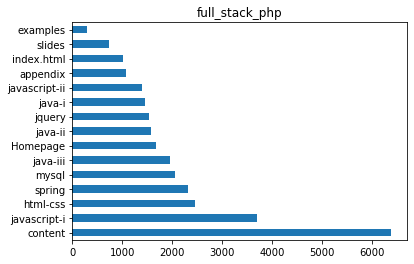

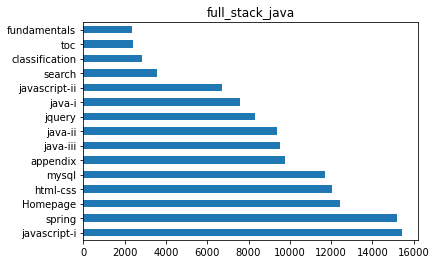

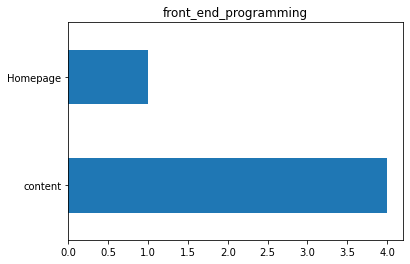

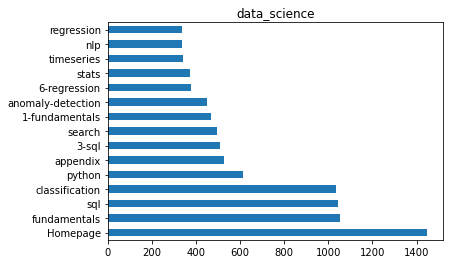

In [12]:
df = explore_q6_df()

for program in df.program_id.unique():
    df[df.program_id==(program)].coursework_topic.value_counts().head(15).plot.barh()
    plt.title(program)
    plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200132 entries, 0 to 900222
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   path               200132 non-null  object        
 1   user_id            200132 non-null  int64         
 2   cohort_id          200132 non-null  float64       
 3   ip                 200132 non-null  object        
 4   name               200132 non-null  object        
 5   start_date         200132 non-null  datetime64[ns]
 6   end_date           200132 non-null  datetime64[ns]
 7   created_at         200132 non-null  datetime64[ns]
 8   updated_at         200132 non-null  datetime64[ns]
 9   program_id         200132 non-null  object        
 10  date_time          200132 non-null  datetime64[ns]
 11  coursework_topic   200132 non-null  object        
 12  specific_resource  200132 non-null  object        
 13  further_info       200132 non-null  object  

In [14]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time,coursework_topic,specific_resource,further_info
0,/,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03,Homepage,None,None
1,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02,java-ii,None,None
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05,java-ii,object-oriented-programming,None
3,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06,slides,object_oriented_programming,None
30,/,11,1.0,97.105.19.61,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 10:14:47,Homepage,None,None


In [15]:
# I want to show the average user timeline for accessing the curriculum post-grad, and then by program of study.

# set date_time column to index
df = df.set_index(df.date_time).sort_index()


In [16]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time,coursework_topic,specific_resource,further_info
date_time,,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03,Homepage,None,None
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02,java-ii,None,None
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05,java-ii,object-oriented-programming,None
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06,slides,object_oriented_programming,None
2018-01-26 10:14:47,/,11,1.0,97.105.19.61,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 10:14:47,Homepage,None,None


In [ ]:
# create subsets to graph, by program, with monthly access counts
data_science_tl = df.groupby('program_id').resample('M').sum().plot.line()

In [ ]:
# My graph:
# x-axis: time in months after graduation
# y-axis: count of times curriculum is accessed
# data: average times the curriculum is acccessed by the average student in each program after graduation, line plots


In [38]:

# grad_access_diff column: months after graduation curriculum is accessed

grad_access_diff = (((df.date_time - df.end_date)/pd.Timedelta('1D'))/30).round(0)
df['grad_access_diff'] = grad_access_diff
df.head()
#df.groupby('program_id').resample('M').mean()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time,coursework_topic,specific_resource,further_info,grad_access_diff
date_time,,,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03,Homepage,None,None,24.0
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02,java-ii,None,None,24.0
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05,java-ii,object-oriented-programming,None,24.0
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06,slides,object_oriented_programming,None,24.0
2018-01-26 10:14:47,/,11,1.0,97.105.19.61,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 10:14:47,Homepage,None,None,46.0


- resample monthly for the y, just pulling from the date-time index
- count
- x axis will be time because of index
df.resample('M).

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200132 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   path               200132 non-null  object        
 1   user_id            200132 non-null  int64         
 2   cohort_id          200132 non-null  float64       
 3   ip                 200132 non-null  object        
 4   name               200132 non-null  object        
 5   start_date         200132 non-null  datetime64[ns]
 6   end_date           200132 non-null  datetime64[ns]
 7   created_at         200132 non-null  datetime64[ns]
 8   updated_at         200132 non-null  datetime64[ns]
 9   program_id         200132 non-null  object        
 10  date_time          200132 non-null  datetime64[ns]
 11  coursework_topic   200132 non-null  object        
 12  specific_resource  200132 non-null  object        
 13  further_in

In [40]:
y1 = df.groupby(['program_id', 'grad_access_diff']).date_time.count()
y1 = y1.reset_index()
y1
# needed a double groupby, to fuse the values to graph

,program_id,grad_access_diff,date_time
0,data_science,0.0,1590
1,data_science,1.0,3046
2,data_science,2.0,1422
3,data_science,3.0,1218
4,data_science,4.0,959
...,...,...,...
156,full_stack_php,66.0,13
157,full_stack_php,67.0,9
158,full_stack_php,72.0,5
159,full_stack_php,78.0,2


<AxesSubplot:xlabel='grad_access_diff', ylabel='date_time'>

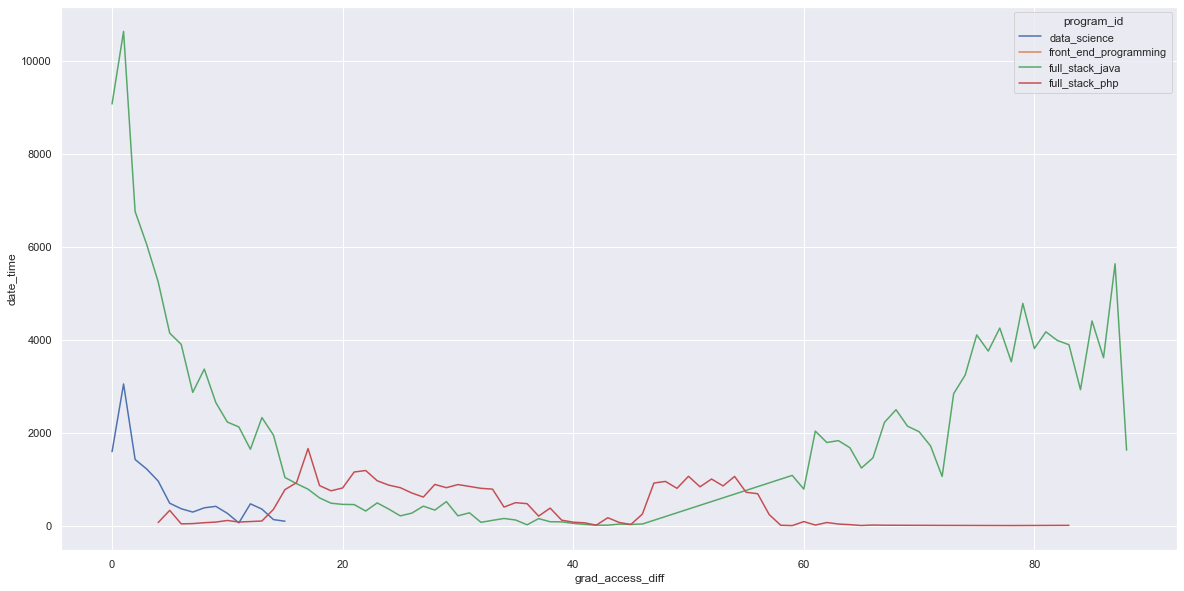

In [41]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.lineplot(data=y1, x=y1.grad_access_diff, y=y1.date_time, hue=y1.program_id)


In [37]:
# let's get the per capita number 
y2 = df.groupby(['program_id', 'grad_access_diff', 'user_id']).date_time.count()
y2


program_id      grad_access_diff  user_id
data_science    0.0               268        2
                                  476        4
                                  485        3
                                  578        1
                                  583        1
                                            ..
full_stack_php  72.2              170        5
                77.5              170        1
                78.4              170        1
                82.7              148        2
                82.9              148        4
Name: date_time, Length: 11969, dtype: int64

In [ ]:
y2 = y2.reset_index()
y2
# needed a double groupby, to fuse the values to graph



In [ ]:

sns.set(rc = {'figure.figsize':(20,10)})
sns.lineplot(data=y1, x=y1.grad_access_diff, y=y1.date_time, hue=y1.program_id)

In [26]:
df.date_time.count()

200132